<a href="https://colab.research.google.com/github/sajeebju/Deep-Learning/blob/main/cifar10_ANN%26CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse','ship', 'truck']

In [ ]:
def plot_sample(X, y, index):

  plt.figure(figsize = (15, 2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

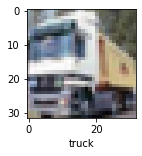

In [ ]:
plot_sample(x_train, y_train, 1)

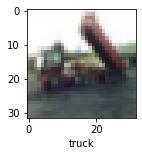

In [ ]:
plot_sample(x_train, y_train, 2)

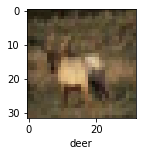

In [ ]:
plot_sample(x_train, y_train, 3)

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# A simple artificial Neural Network

In [ ]:
model = tf.keras.Sequential([
                              
    tf.keras.layers.Flatten(input_shape  = (32, 32, 3)),
    tf.keras.layers.Dense(3000, activation = 'relu'),
    tf.keras.layers.Dense(1000, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(optimizer = 'SGD',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 6s 3ms/step - loss: 1.9245 - accuracy: 0.3110
Epoch 2/5
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6402 - accuracy: 0.4257
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5595 - accuracy: 0.4493
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4919 - accuracy: 0.4723
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4351 - accuracy: 0.4954


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = model.predict(x_test) 

In [ ]:
y_pred_classes = [np.argmax(element) for element in y_pred]

In [ ]:
print("Clasification Report: \n", classification_report(y_test, y_pred_classes))

Clasification Report: 
               precision    recall  f1-score   support

           0       0.64      0.45      0.53      1000
           1       0.72      0.41      0.52      1000
           2       0.32      0.45      0.38      1000
           3       0.38      0.27      0.32      1000
           4       0.37      0.38      0.37      1000
           5       0.40      0.38      0.39      1000
           6       0.56      0.43      0.49      1000
           7       0.44      0.66      0.53      1000
           8       0.73      0.45      0.56      1000
           9       0.42      0.74      0.53      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.46     10000
weighted avg       0.50      0.46      0.46     10000



In [ ]:
# Convolutional Neural Network

In [ ]:
cnn = tf.keras.Sequential([
                           
  
  tf.keras.layers.Conv2D(filters=32, kernel_size= (3,3), activation = 'relu', input_shape = (32, 32, 3)),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(filters=64, kernel_size= (3,3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D((2,2)),


  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation = "relu"),
  tf.keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
cnn.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [ ]:
cnn.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 10s 3ms/step - loss: 1.6877 - accuracy: 0.3878
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.1441 - accuracy: 0.5964
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9836 - accuracy: 0.6567
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8906 - accuracy: 0.6923
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.8154 - accuracy: 0.7168
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.7507 - accuracy: 0.7373
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6986 - accuracy: 0.7577
Epoch 8/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.6592 - accuracy: 0.7712
Epoch 9/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.6123 - accuracy: 0.7867
Epoch 10/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.58

In [ ]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9048 - accuracy: 0.7016


[0.9048290848731995, 0.7016000151634216]

In [ ]:
# Comparison between ANN & CNN models and their accuracy on cifar10 dataset

# ANN gives 50% accuracy and CNN gives almost 80% accuracy on the same dataset